In [43]:
import os, fnmatch
from matplotlib.pylab import plt
def clean_up_for_parser(entry):
    filename = 'extract-partners-'+entry
    print(filename)
    f=open(filename,"a")
    with open(entry) as fp:
        for line in fp:
            if line[:11] == '! Checksum:':
                continue
            elif line[:10] == '! Version:':
                continue
            elif line[:10] == '! Expires:':
                continue
            elif line[:8] == '! Title:':
                continue
            elif line[:11] =='! Homepage:':
                continue
            elif line == '!':
                continue
            elif line[:16] == '! *** exceptions':
                continue
            elif line[:3] == '!@@':
                continue
            elif line[:3] == '! @':
                continue
            elif line[:3] == '! #':
                continue
            elif line[:3] == '! |':
                continue
            elif line[:3] == '! /':
                continue
            elif line[:2] =='!/':
                continue
            elif '#@#' in line:
                continue
            elif '##' in line:
                continue
            elif line[0] == "!":
                if '(' in line:
                    start = line.index('(')
                    f.write(line[:start])  
                    f.write('\n')
                else: 
                    f.write(line)
    f.close()

    return filename

In [44]:
listOfFiles = os.listdir('/Users/prashanthikanniapanmurthy/Desktop/Evolution-of-tracker-blocking-lists/GraphCodes')
pattern = "exception*.txt"

# delete the files if present 

for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
        with open(entry,"r") as fi:
            if '2019' in entry:
                continue
            print("Running -->", entry)
            clean_up_for_parser(entry)

Running --> exceptionrules-2016-march.txt
extract-partners-exceptionrules-2016-march.txt
Running --> exceptionrules-2017-march.txt
extract-partners-exceptionrules-2017-march.txt
Running --> exceptionrules-2012-march.txt
extract-partners-exceptionrules-2012-march.txt
Running --> exceptionrules-2014-march.txt
extract-partners-exceptionrules-2014-march.txt
Running --> exceptionrules-2013-march.txt
extract-partners-exceptionrules-2013-march.txt
Running --> exceptionrules-2018-march.txt
extract-partners-exceptionrules-2018-march.txt
Running --> exceptionrules-2015-march.txt
extract-partners-exceptionrules-2015-march.txt


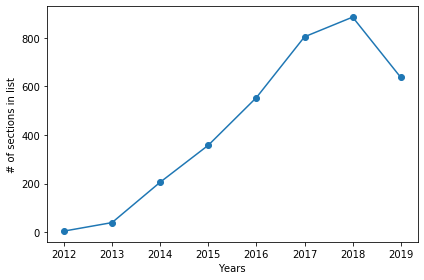

In [55]:
listOfFiles = os.listdir('/Users/prashanthikanniapanmurthy/Desktop/Evolution-of-tracker-blocking-lists/GraphCodes')
pattern = "extract-partners-exceptionrules*.txt"

data_tmp = {}
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
        unique = set()
        with open(entry) as fp:
            for line in fp:
                unique.add(line)
        
        year = entry.split('-')[3]
        data_tmp.update({year:len(unique)})

# print(data_tmp)

data = {}

listofTuples = sorted(data_tmp.items(), key=lambda x: x[0])

for elem in listofTuples:
    data.update({elem[0]:elem[1]})
    
# print(data)
x =list(data.keys())
x.append('2019')
y = []
for key in data.keys():
    y.append(data[key])
y.append(637) # extracted from ER-G1-2-affiliates-firstParty code

# for i in range(len(x)):
#     print(x[i],y[i])
    
plt.plot(x,y,'-o')
plt.xlabel("Years")
plt.ylabel("# of sections in list")
# plt.show()
plt.tight_layout()
plt.savefig('ER-partner-distribution.pdf', format='pdf', dpi=1200)

    